In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from apyori import apriori

In [2]:
data = pd.read_csv("Hotel Reservations.csv")
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0) 
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_status'}>, <Axes: >]],
      dtype=object)

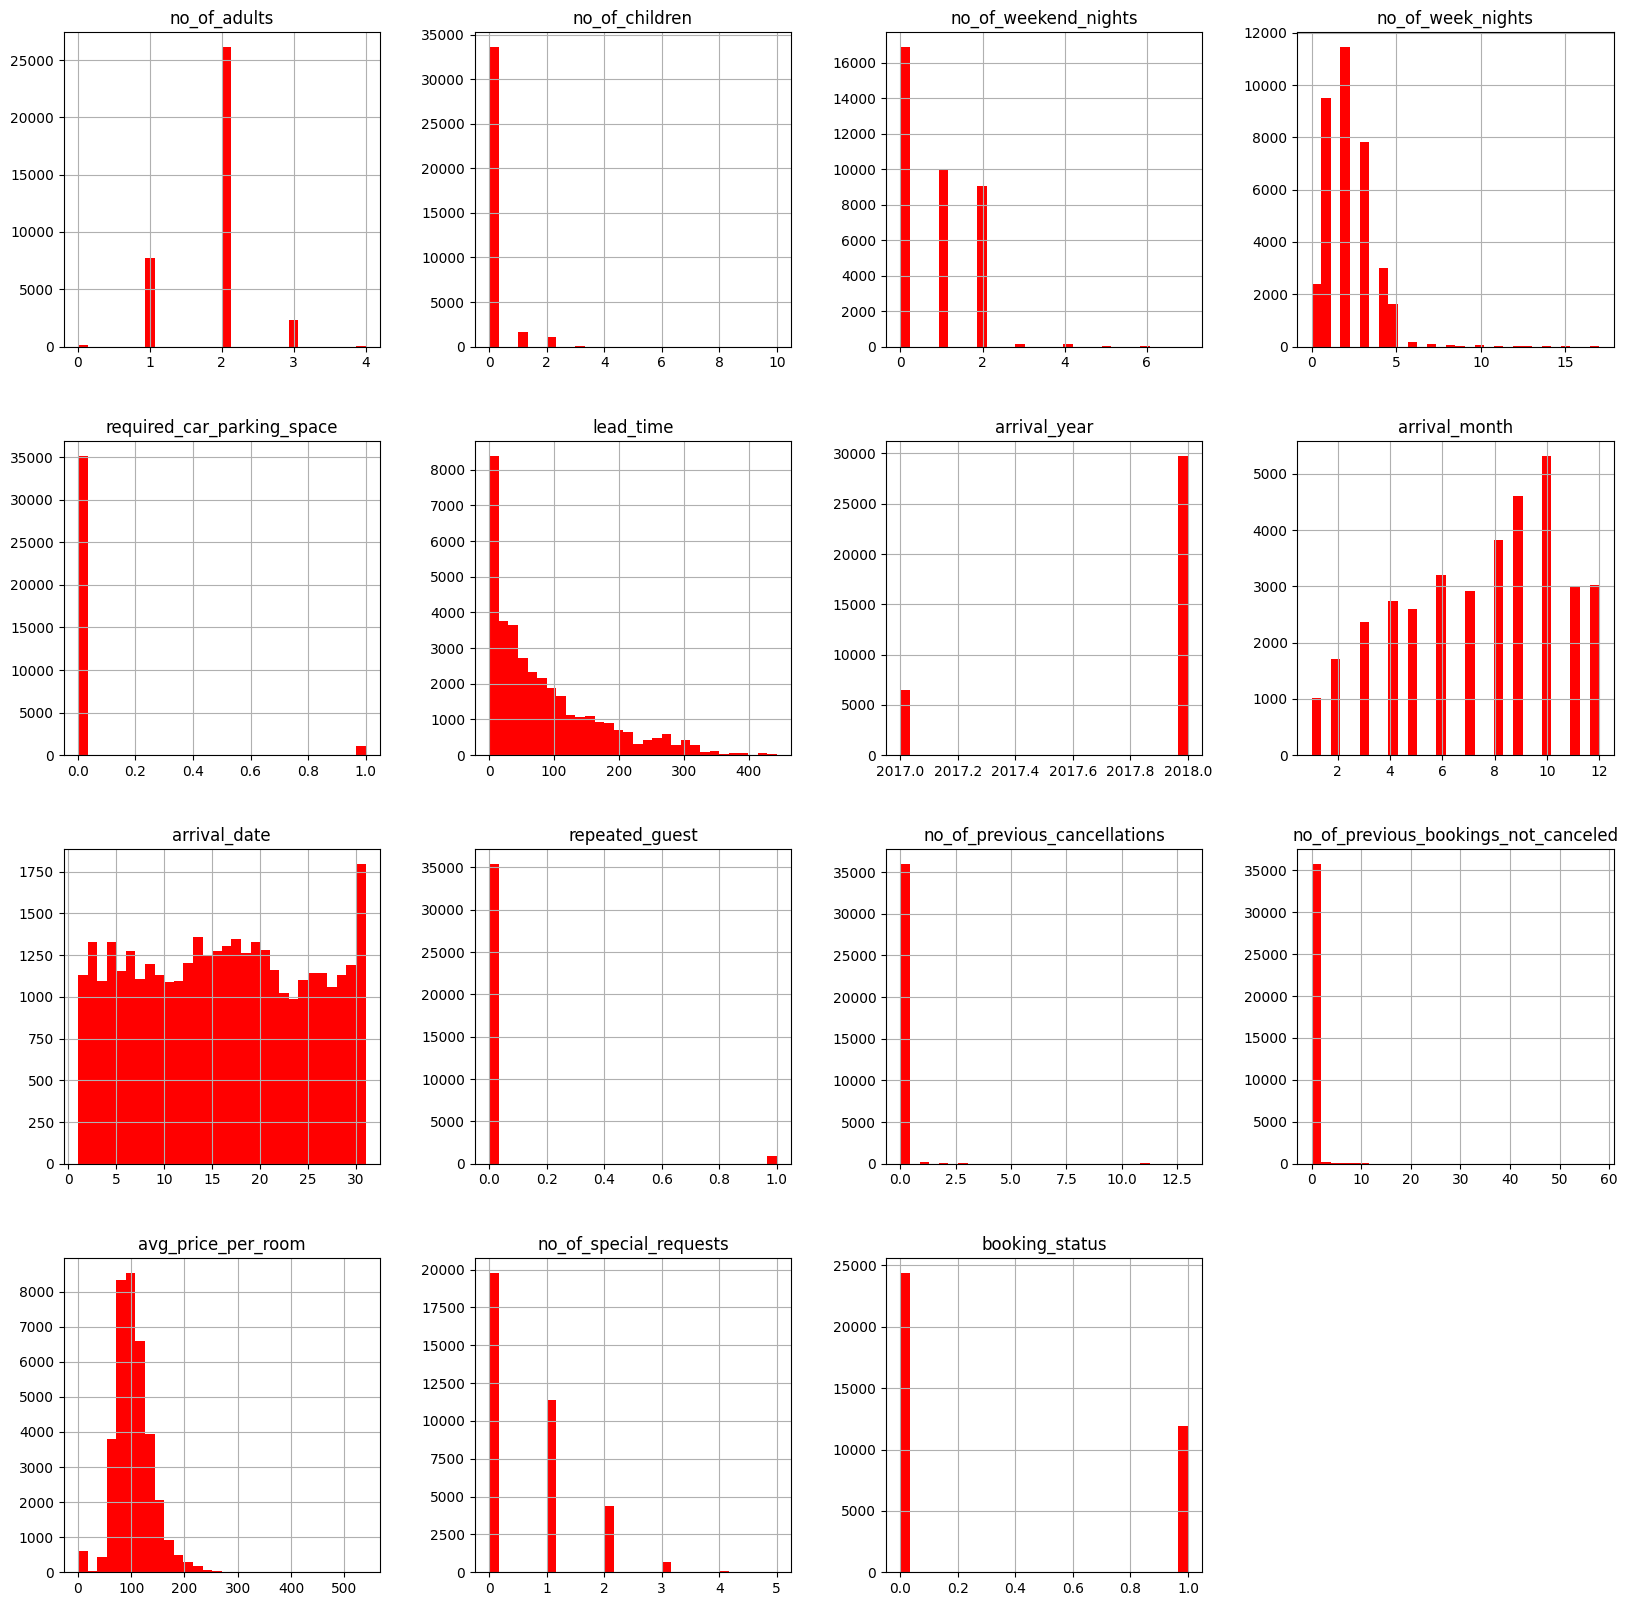

In [6]:
data.hist(bins = 30, figsize = (20,20), color = 'r')

In [7]:
df = data['lead_time']
z_scores = (df - df.mean()) / df.std()
data['lead_time'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_adults']
z_scores = (df - df.mean()) / df.std()
data['no_of_adults'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_children']
z_scores = (df - df.mean()) / df.std()
data['no_of_children'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_week_nights']
z_scores = (df - df.mean()) / df.std()
data['no_of_week_nights'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_weekend_nights']
z_scores = (df - df.mean()) / df.std()
data['no_of_weekend_nights'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_previous_cancellations']
z_scores = (df - df.mean()) / df.std()
data['no_of_previous_cancellations'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_previous_bookings_not_canceled']
z_scores = (df - df.mean()) / df.std()
data['no_of_previous_bookings_not_canceled'] = df[(np.abs(z_scores) < 3)]

df = data['avg_price_per_room']
z_scores = (df - df.mean()) / df.std()
data['avg_price_per_room'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_special_requests']
z_scores = (df - df.mean()) / df.std()
data['no_of_special_requests'] = df[(np.abs(z_scores) < 3)]

In [8]:
data = data.dropna()
data = data.reset_index(drop=True)
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1.0,2.0,Meal Plan 1,0,Room_Type 1,224.0,2017,10,2,Offline,0,0.0,0.0,65.00,0.0,0
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0,Room_Type 1,5.0,2018,11,6,Online,0,0.0,0.0,106.68,1.0,0
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0,Room_Type 1,1.0,2018,2,28,Online,0,0.0,0.0,60.00,0.0,1
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0,Room_Type 1,211.0,2018,5,20,Online,0,0.0,0.0,100.00,0.0,1
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0,Room_Type 1,48.0,2018,4,11,Online,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,INN36271,3.0,0.0,2.0,6.0,Meal Plan 1,0,Room_Type 4,85.0,2018,8,3,Online,0,0.0,0.0,167.80,1.0,0
33340,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0,Room_Type 1,228.0,2018,10,17,Online,0,0.0,0.0,90.95,2.0,1
33341,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0,Room_Type 1,148.0,2018,7,1,Online,0,0.0,0.0,98.39,2.0,0
33342,INN36274,2.0,0.0,0.0,3.0,Not Selected,0,Room_Type 1,63.0,2018,4,21,Online,0,0.0,0.0,94.50,0.0,1


<Axes: >

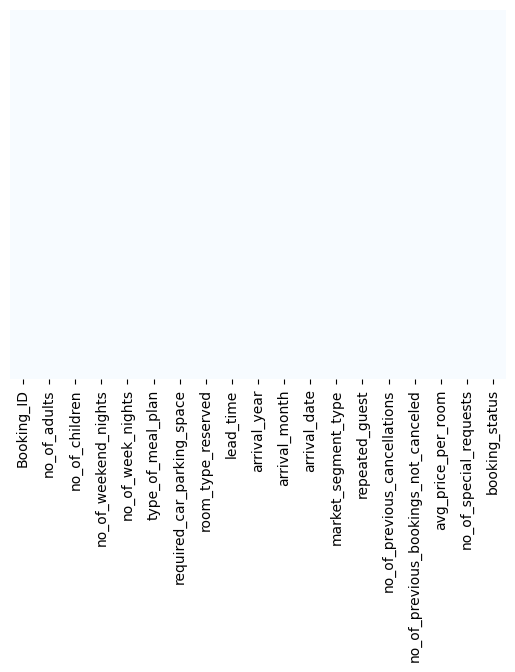

In [9]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_status'}>, <Axes: >]],
      dtype=object)

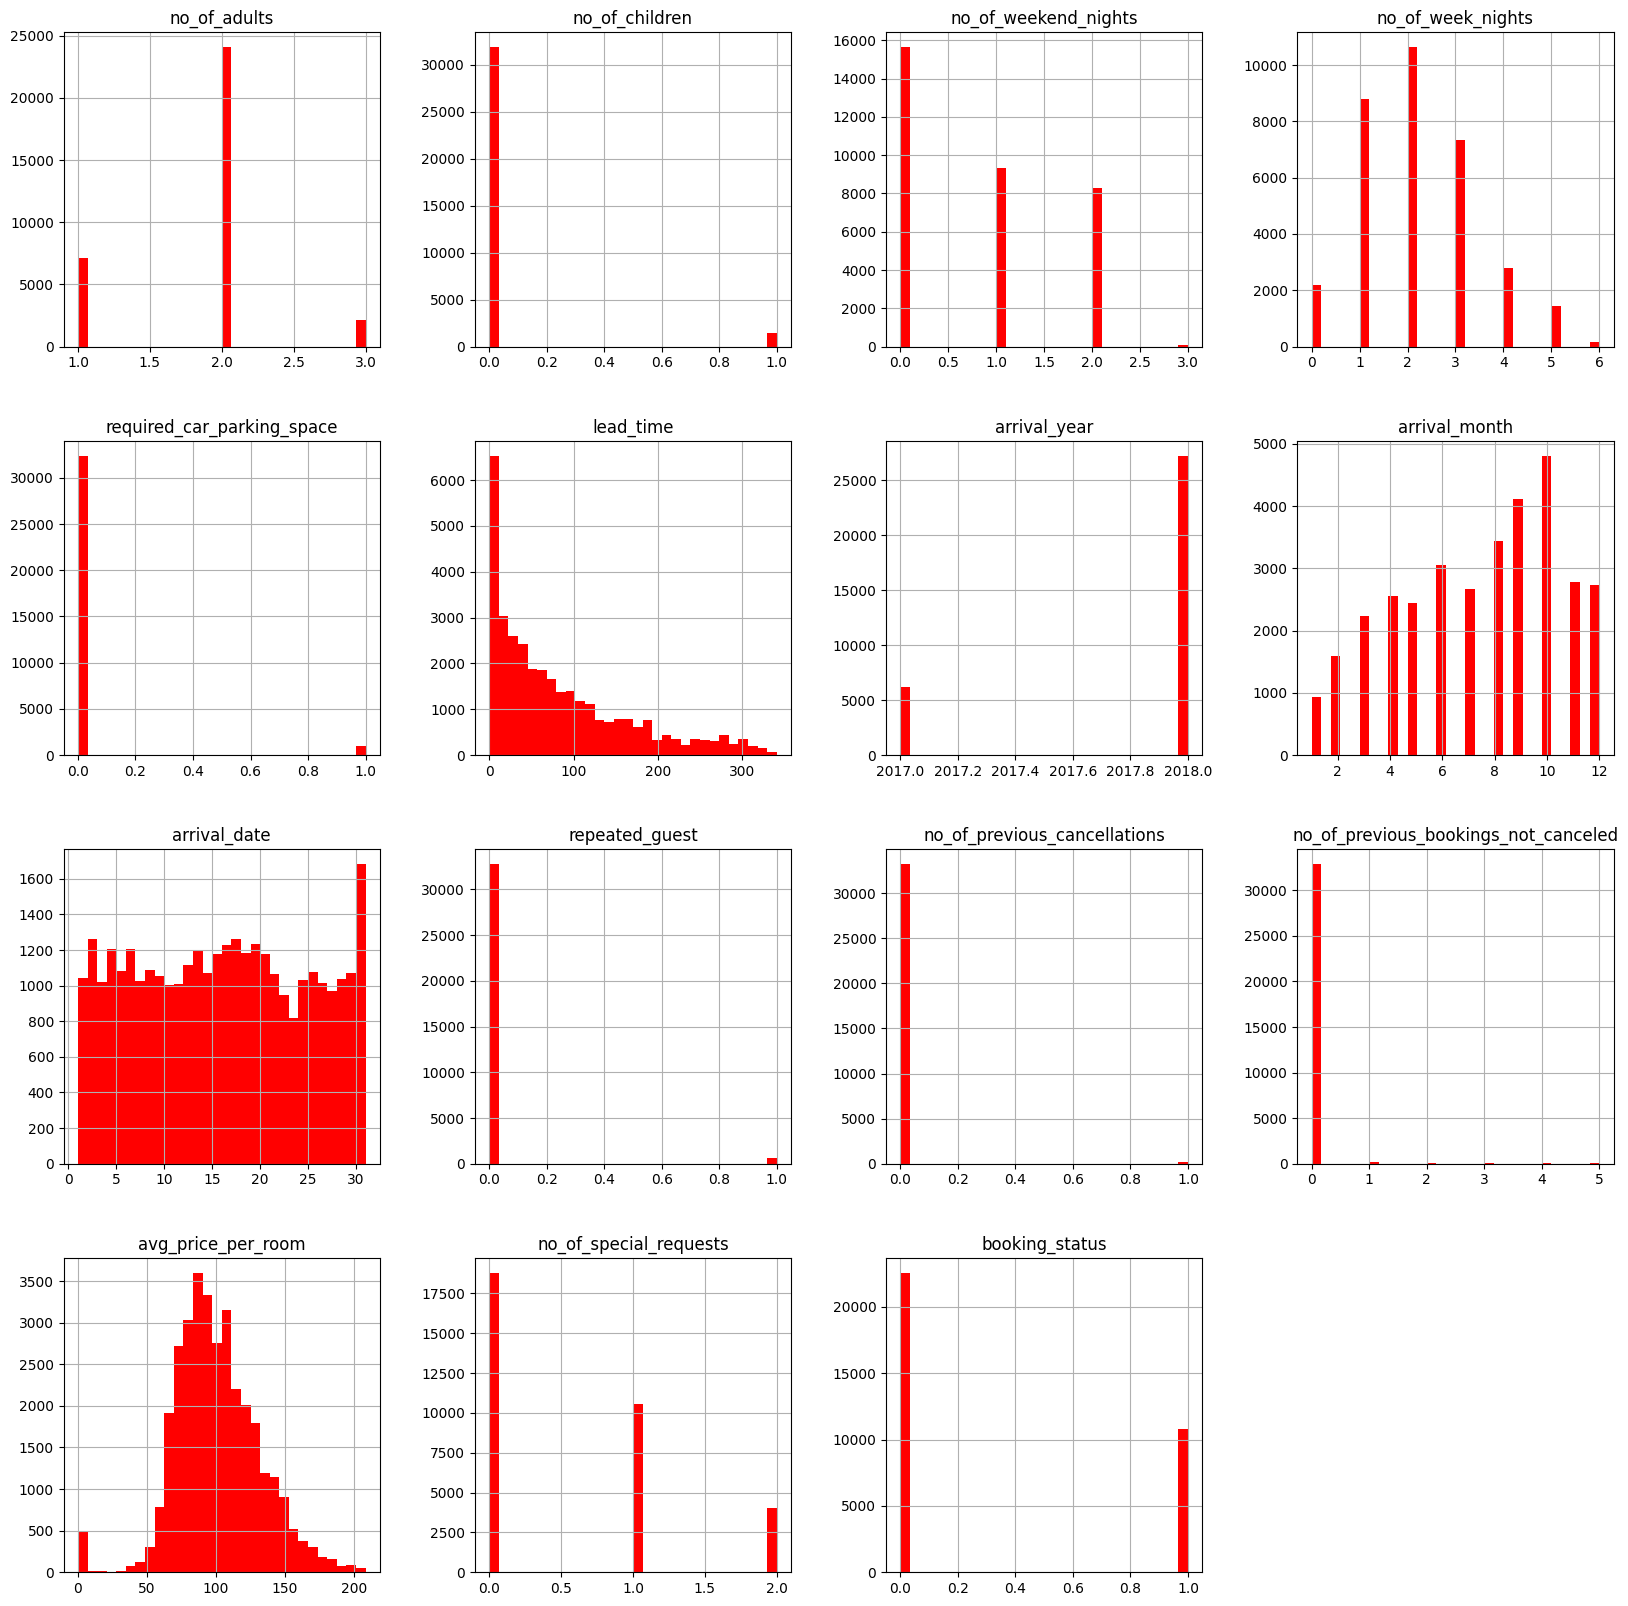

In [10]:
data.hist(bins = 30, figsize = (20,20), color = 'r')

In [11]:
data_int = data.select_dtypes(include=['int', 'float'])
data_int

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,0,224.0,2017,10,2,0,0.0,0.0,65.00,0.0,0
1,2.0,0.0,2.0,3.0,0,5.0,2018,11,6,0,0.0,0.0,106.68,1.0,0
2,1.0,0.0,2.0,1.0,0,1.0,2018,2,28,0,0.0,0.0,60.00,0.0,1
3,2.0,0.0,0.0,2.0,0,211.0,2018,5,20,0,0.0,0.0,100.00,0.0,1
4,2.0,0.0,1.0,1.0,0,48.0,2018,4,11,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,3.0,0.0,2.0,6.0,0,85.0,2018,8,3,0,0.0,0.0,167.80,1.0,0
33340,2.0,0.0,1.0,3.0,0,228.0,2018,10,17,0,0.0,0.0,90.95,2.0,1
33341,2.0,0.0,2.0,6.0,0,148.0,2018,7,1,0,0.0,0.0,98.39,2.0,0
33342,2.0,0.0,0.0,3.0,0,63.0,2018,4,21,0,0.0,0.0,94.50,0.0,1


In [12]:
data_object = data.select_dtypes(include=['object'])
data_object = data_object.drop('Booking_ID', axis=1)
data_object

,type_of_meal_plan,room_type_reserved,market_segment_type
0,Meal Plan 1,Room_Type 1,Offline
1,Not Selected,Room_Type 1,Online
2,Meal Plan 1,Room_Type 1,Online
3,Meal Plan 1,Room_Type 1,Online
4,Not Selected,Room_Type 1,Online
...,...,...,...
33339,Meal Plan 1,Room_Type 4,Online
33340,Meal Plan 1,Room_Type 1,Online
33341,Meal Plan 1,Room_Type 1,Online
33342,Not Selected,Room_Type 1,Online


In [13]:
data_object = data.select_dtypes(include=['object'])
data_object = data_object.drop('Booking_ID', axis=1)
data_object

,type_of_meal_plan,room_type_reserved,market_segment_type
0,Meal Plan 1,Room_Type 1,Offline
1,Not Selected,Room_Type 1,Online
2,Meal Plan 1,Room_Type 1,Online
3,Meal Plan 1,Room_Type 1,Online
4,Not Selected,Room_Type 1,Online
...,...,...,...
33339,Meal Plan 1,Room_Type 4,Online
33340,Meal Plan 1,Room_Type 1,Online
33341,Meal Plan 1,Room_Type 1,Online
33342,Not Selected,Room_Type 1,Online


In [14]:
onehotencoder = OneHotEncoder()
data_object = onehotencoder.fit_transform(data_object).toarray()
data_object.shape

(33344, 16)

In [15]:
feature_names = onehotencoder.get_feature_names_out()

data_object_name = pd.DataFrame(data_object, columns=feature_names)
data_object_name

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33340,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33342,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
data_all = pd.concat([data_object_name, data_int], axis = 1)
data_all

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,224.0,2017,10,2,0,0.0,0.0,65.00,0.0,0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2018,11,6,0,0.0,0.0,106.68,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2018,2,28,0,0.0,0.0,60.00,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,211.0,2018,5,20,0,0.0,0.0,100.00,0.0,1
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,48.0,2018,4,11,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,85.0,2018,8,3,0,0.0,0.0,167.80,1.0,0
33340,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,228.0,2018,10,17,0,0.0,0.0,90.95,2.0,1
33341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,148.0,2018,7,1,0,0.0,0.0,98.39,2.0,0
33342,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,63.0,2018,4,21,0,0.0,0.0,94.50,0.0,1


array([[<Axes: title={'center': 'type_of_meal_plan_Meal Plan 1'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 2'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 3'}>,
        <Axes: title={'center': 'type_of_meal_plan_Not Selected'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 1'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 2'}>],
       [<Axes: title={'center': 'room_type_reserved_Room_Type 3'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 4'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 5'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 6'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 7'}>,
        <Axes: title={'center': 'market_segment_type_Aviation'}>],
       [<Axes: title={'center': 'market_segment_type_Complementary'}>,
        <Axes: title={'center': 'market_segment_type_Corporate'}>,
        <Axes: title={'center': 'market_segment_t

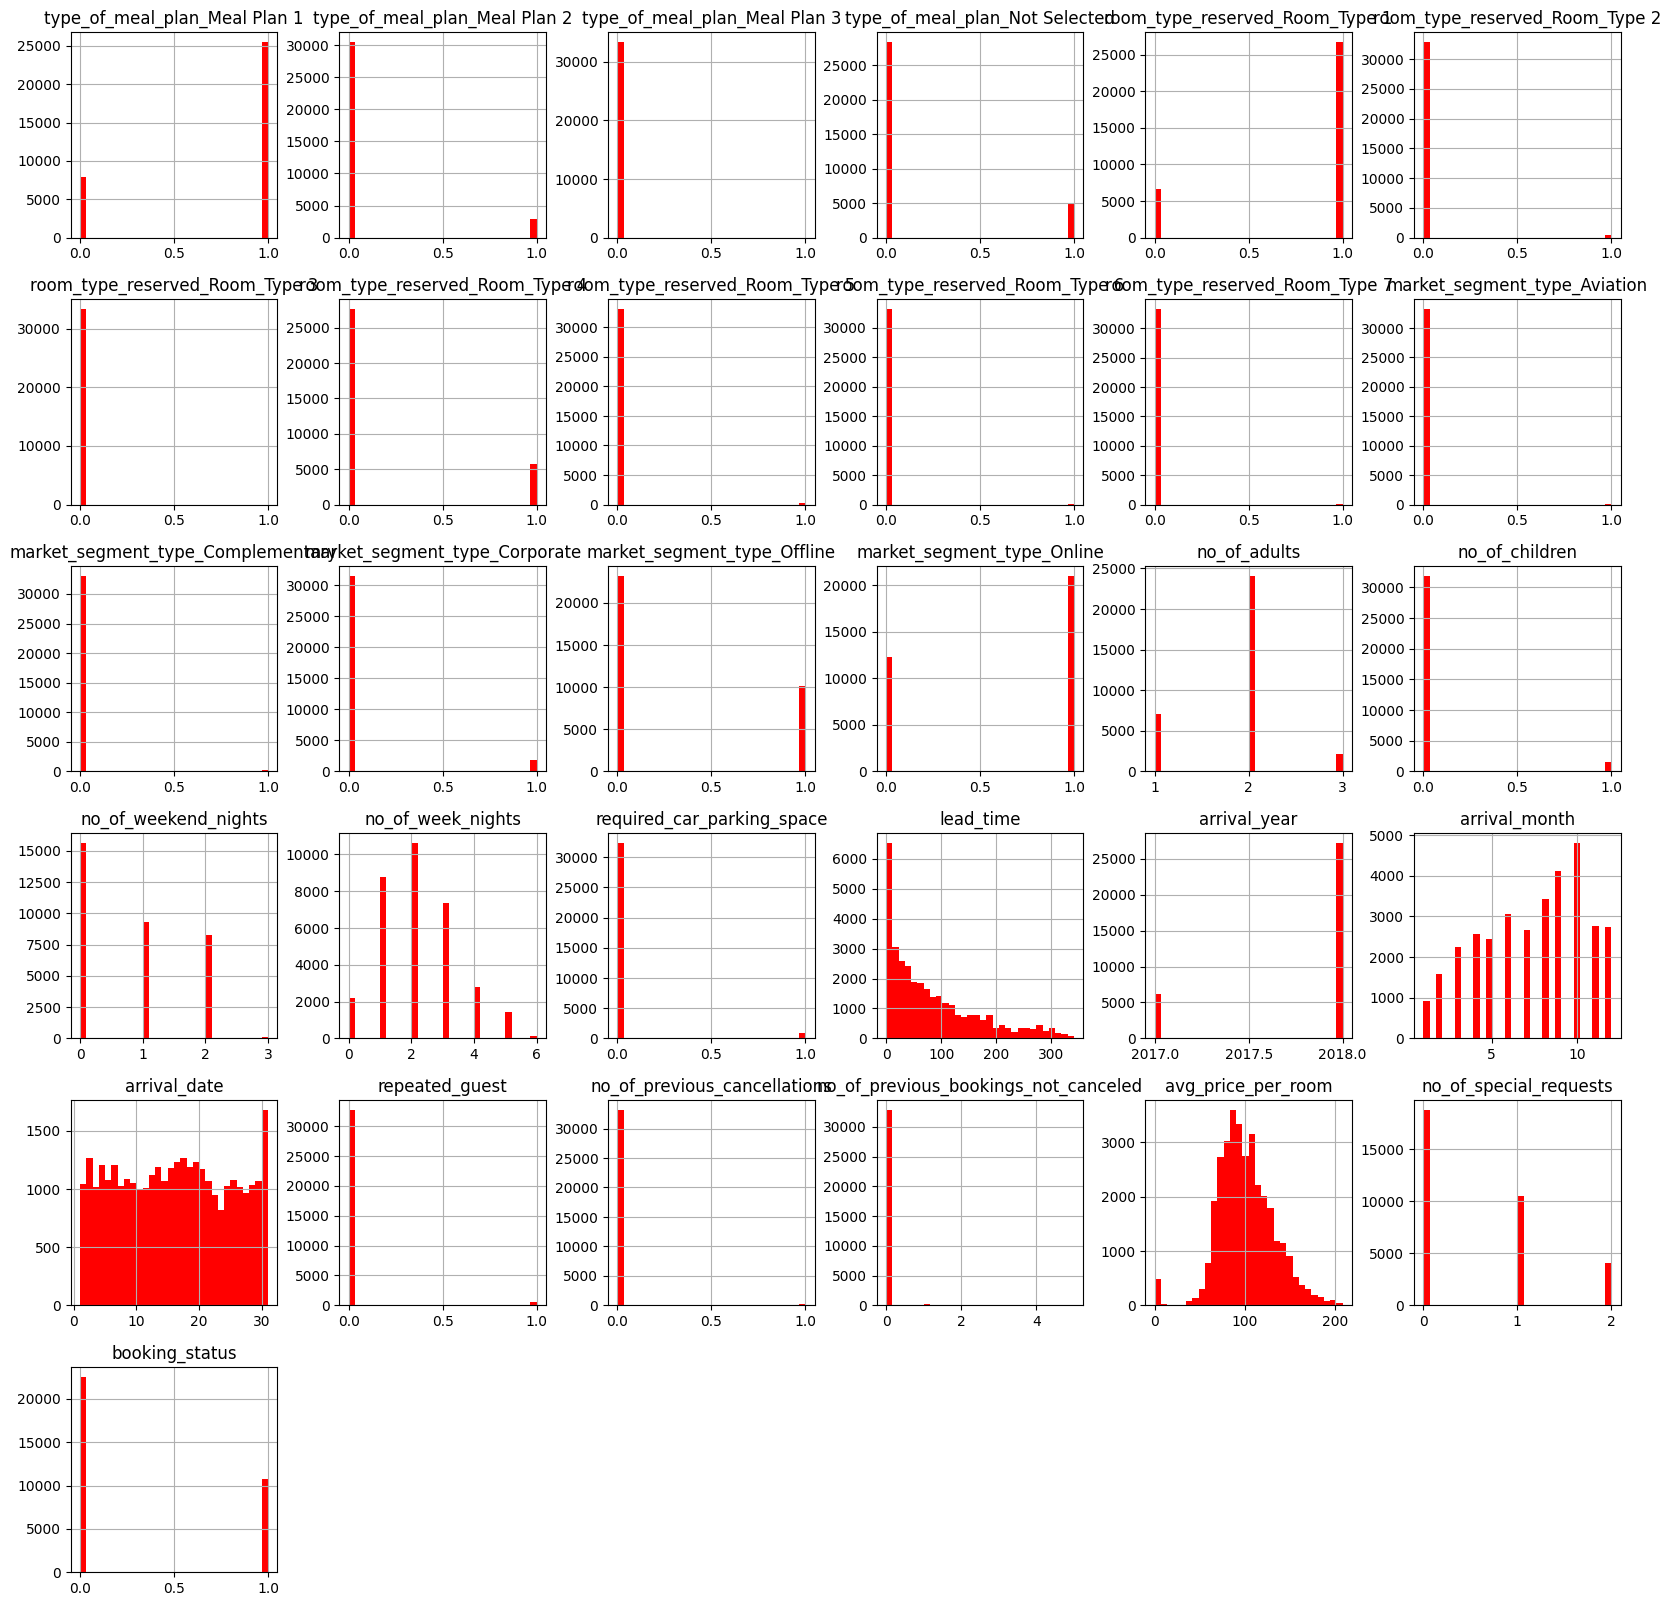

In [17]:
data_all.hist(bins = 30, figsize = (20,20), color = 'r')

In [18]:
X = data_all.drop('booking_status', axis=1)
y = data_all['booking_status']

In [19]:
# create a SMOTE object
smote = SMOTE()

# fit the SMOTE object to the data and oversample
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# combine the oversampled data into a new DataFrame
df_oversampled = pd.concat([pd.DataFrame(X_oversampled), pd.DataFrame(y_oversampled)], axis=1)
df_oversampled

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,224.000000,2017,10,2,0,0.0,0.0,65.000000,0.000000,0
1,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,5.000000,2018,11,6,0,0.0,0.0,106.680000,1.000000,0
2,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,1.000000,2018,2,28,0,0.0,0.0,60.000000,0.000000,1
3,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,211.000000,2018,5,20,0,0.0,0.0,100.000000,0.000000,1
4,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,48.000000,2018,4,11,0,0.0,0.0,94.500000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45089,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,...,130.227517,2018,5,12,0,0.0,0.0,113.423232,1.000000,1
45090,0.169769,0.830231,0.0,0.000000,0.830231,0.0,0.0,0.0,0.000000,0.169769,...,313.641850,2018,8,27,0,0.0,0.0,159.728370,0.169769,1
45091,0.863875,0.000000,0.0,0.136125,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,98.136125,2018,4,8,0,0.0,0.0,85.280106,0.863875,1
45092,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,304.000000,2018,11,3,0,0.0,0.0,89.000000,0.000000,1


array([[<Axes: title={'center': 'type_of_meal_plan_Meal Plan 1'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 2'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 3'}>,
        <Axes: title={'center': 'type_of_meal_plan_Not Selected'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 1'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 2'}>],
       [<Axes: title={'center': 'room_type_reserved_Room_Type 3'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 4'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 5'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 6'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 7'}>,
        <Axes: title={'center': 'market_segment_type_Aviation'}>],
       [<Axes: title={'center': 'market_segment_type_Complementary'}>,
        <Axes: title={'center': 'market_segment_type_Corporate'}>,
        <Axes: title={'center': 'market_segment_t

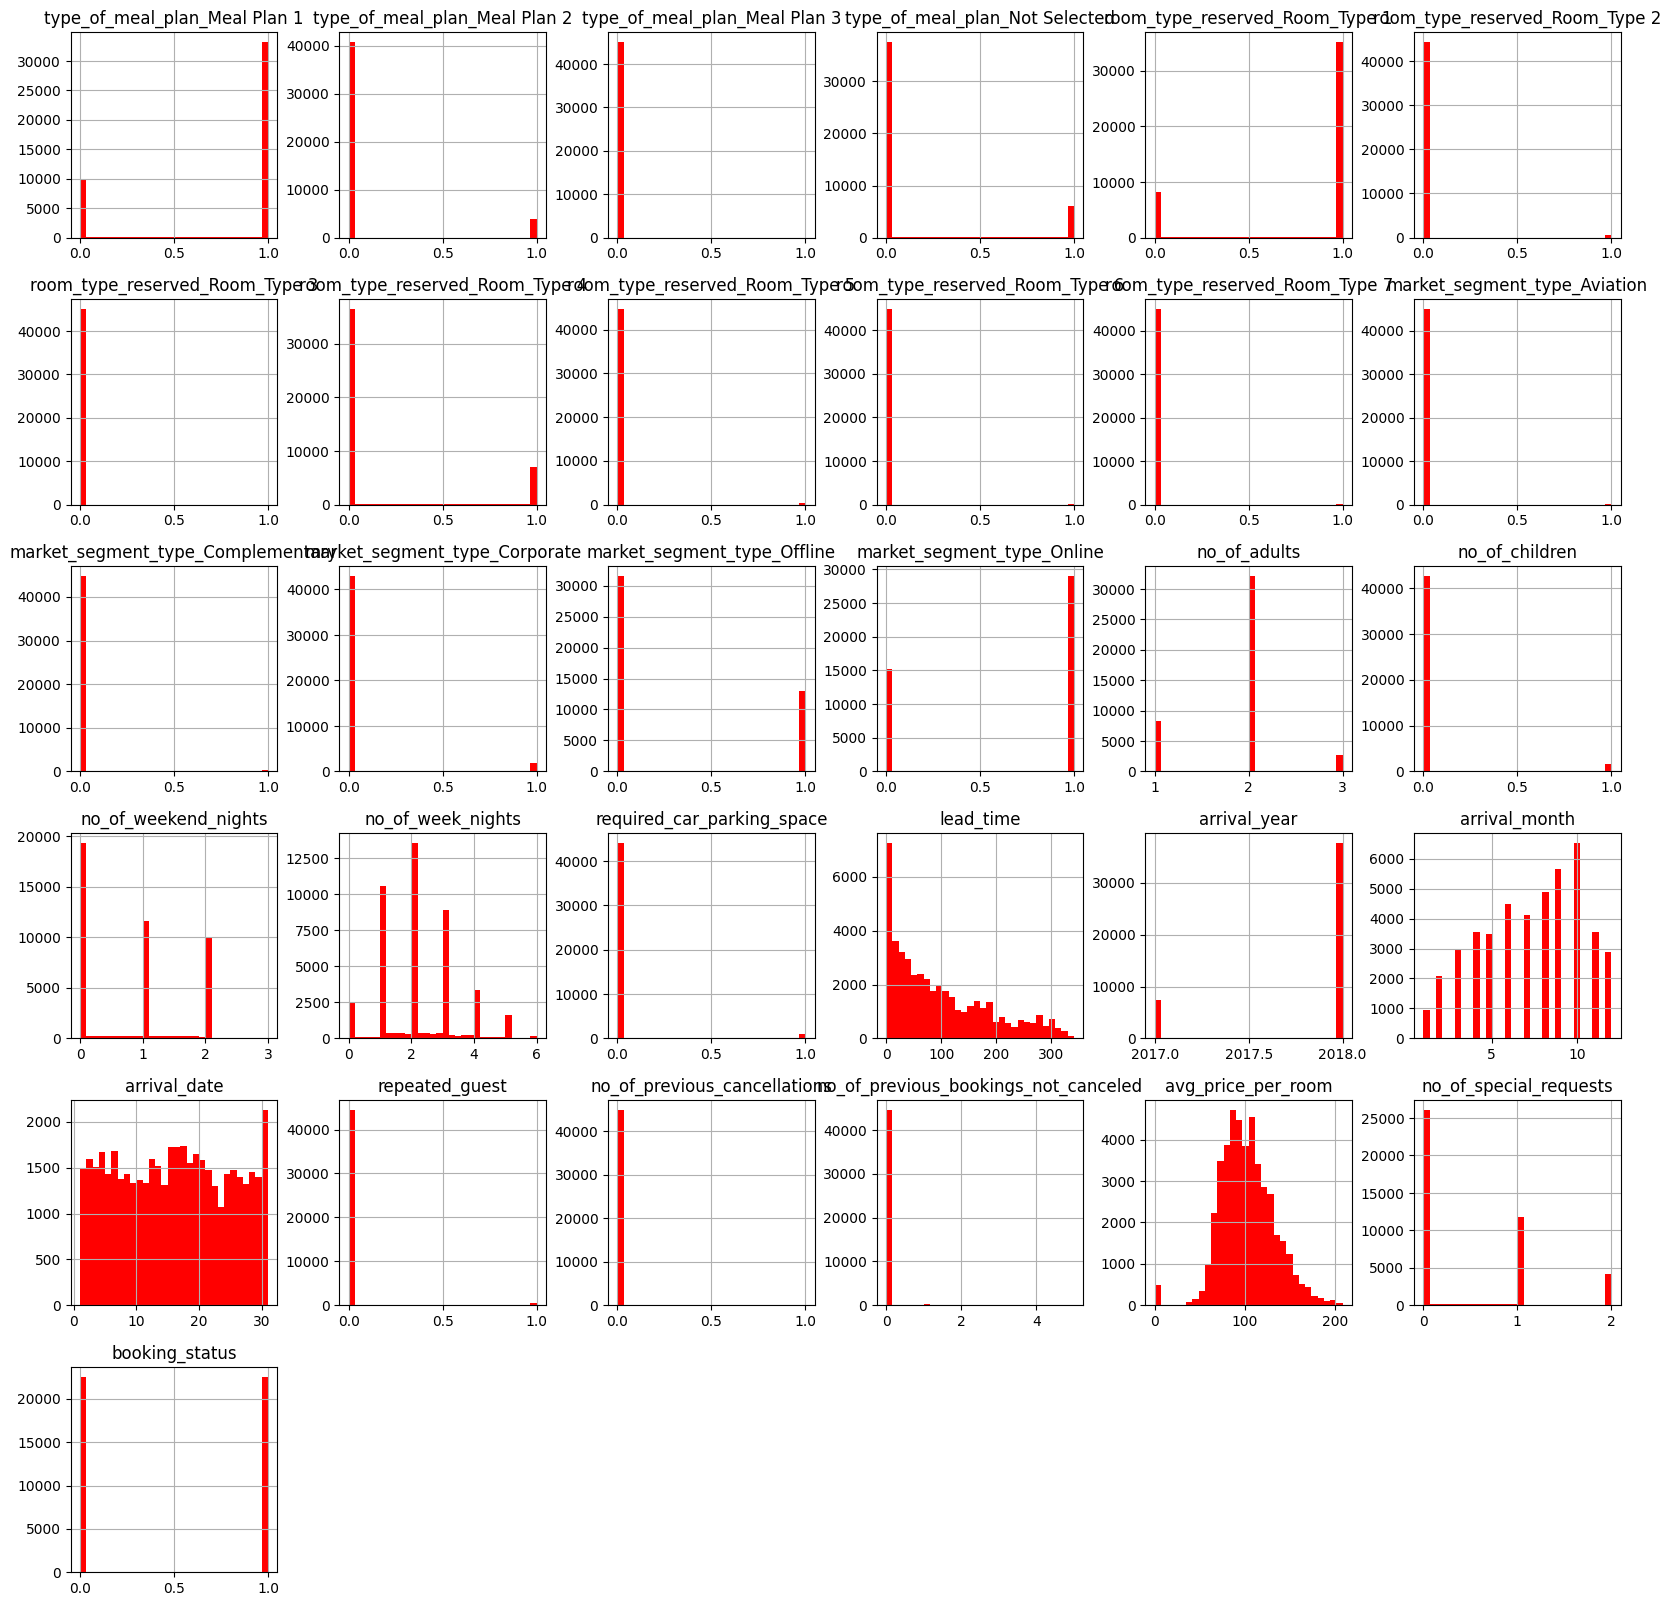

In [20]:
df_oversampled.hist(bins = 30, figsize = (20,20), color = 'r')

In [21]:
X = df_oversampled.drop('booking_status', axis=1)
y = df_oversampled['booking_status']

In [22]:
X.corr()

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
type_of_meal_plan_Meal Plan 1,1.000000,-0.568075,-0.019006,-0.737070,-0.229183,0.040411,0.000634,0.216646,0.029284,0.030823,...,0.022997,-0.023633,0.040631,-0.005369,-0.020052,0.054288,0.028913,0.043672,0.022057,0.011981
type_of_meal_plan_Meal Plan 2,-0.568075,1.000000,-0.003389,-0.136915,0.093290,-0.021891,-0.004714,-0.085962,-0.011405,-0.013369,...,-0.031229,0.210045,-0.198905,0.016128,0.025781,-0.032001,-0.013819,-0.025828,0.107201,-0.081301
type_of_meal_plan_Meal Plan 3,-0.019006,-0.003389,1.000000,-0.004544,-0.016114,-0.001326,-0.000154,0.000750,-0.000865,-0.000736,...,0.012939,-0.010676,-0.001036,-0.009693,0.002761,0.017142,-0.000625,0.014513,-0.021745,0.001654
type_of_meal_plan_Not Selected,-0.737070,-0.136915,-0.004544,1.000000,0.199839,-0.030644,0.003112,-0.190298,-0.025869,-0.026114,...,-0.002441,-0.143669,0.114411,-0.006483,0.002893,-0.039610,-0.023448,-0.031816,-0.113912,0.052272
room_type_reserved_Room_Type 1,-0.229183,0.093290,-0.016114,0.199839,1.000000,-0.237681,-0.027370,-0.916818,-0.159513,-0.136897,...,-0.025770,0.105837,-0.105400,0.015154,-0.026673,0.023978,0.023547,0.012415,-0.370773,-0.122579
room_type_reserved_Room_Type 2,0.040411,-0.021891,-0.001326,-0.030644,-0.237681,1.000000,-0.000407,-0.056253,-0.009950,-0.008798,...,0.024589,0.029873,-0.025186,-0.020207,0.010442,-0.002914,-0.007475,0.005586,-0.066247,0.017285
room_type_reserved_Room_Type 3,0.000634,-0.004714,-0.000154,0.003112,-0.027370,-0.000407,1.000000,-0.006859,-0.001203,-0.001023,...,-0.002174,-0.002982,-0.010869,0.009031,-0.002287,-0.001702,-0.000869,-0.001318,-0.013621,-0.008246
room_type_reserved_Room_Type 4,0.216646,-0.085962,0.000750,-0.190298,-0.916818,-0.056253,-0.006859,1.000000,-0.035393,-0.026689,...,0.017553,-0.109317,0.113447,-0.013141,0.021103,-0.030952,-0.022589,-0.021712,0.376810,0.123620
room_type_reserved_Room_Type 5,0.029284,-0.011405,-0.000865,-0.025869,-0.159513,-0.009950,-0.001203,-0.035393,1.000000,-0.001721,...,-0.002275,-0.024357,0.015895,0.006760,0.005298,0.018081,0.004918,0.022209,0.053803,-0.031557
room_type_reserved_Room_Type 6,0.030823,-0.013369,-0.000736,-0.026114,-0.136897,-0.008798,-0.001023,-0.026689,-0.001721,1.000000,...,0.001428,-0.020928,0.013215,0.013835,0.015075,0.000845,-0.004146,0.000003,0.132976,0.028258


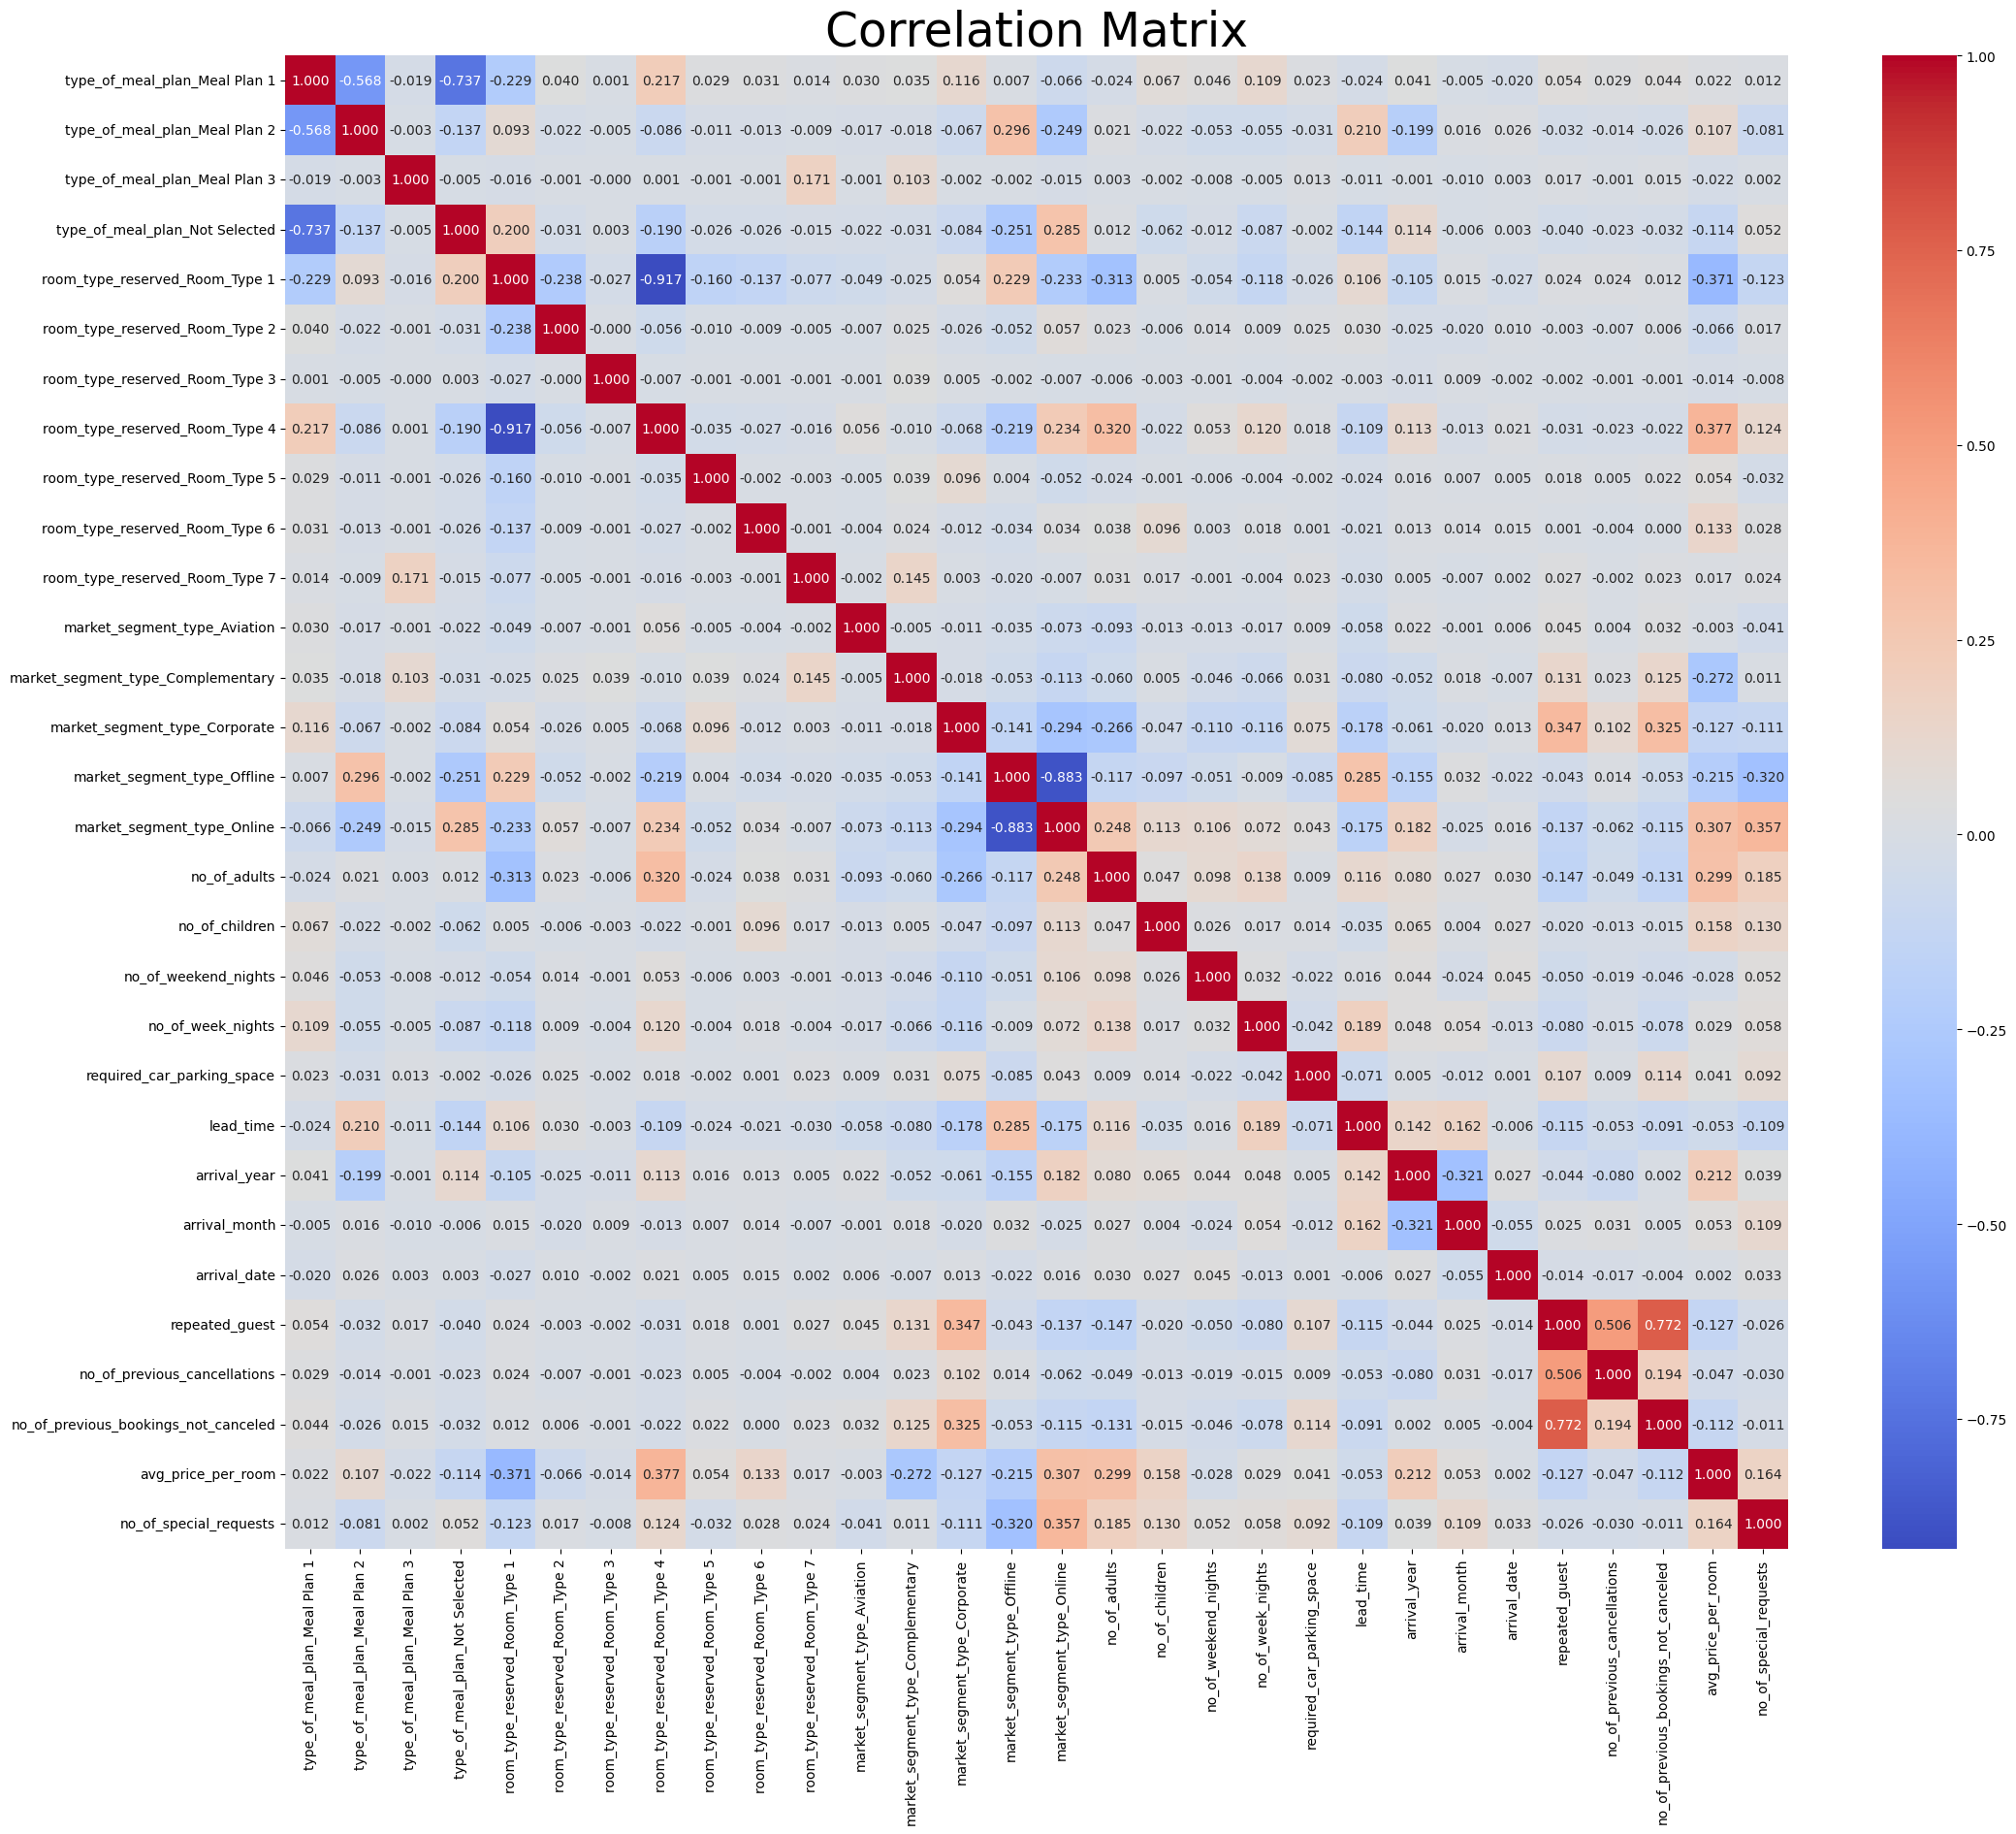

In [23]:
corr = X.corr()

fig, ax = plt.subplots(figsize=(25, 20))

# Create heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.3f', ax=ax)
ax.set_title('Correlation Matrix', fontsize=35)

plt.show()

In [24]:
corr_lead_time = X.corr().loc['avg_price_per_room','lead_time']
corr_arrival_month = X.corr().loc['avg_price_per_room','arrival_month']
corr_booking_status = X.corr().loc['avg_price_per_room','required_car_parking_space']

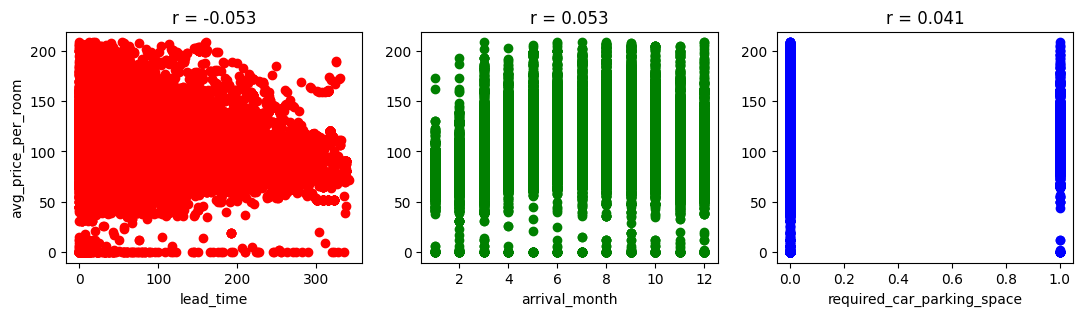

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3))

ax[0].scatter(X['lead_time'], X['avg_price_per_room'], color = 'r')
ax[0].set_xlabel('lead_time')
ax[0].set_ylabel('avg_price_per_room')
ax[0].set_title('r = ' + str(round(corr_lead_time, 3)))

ax[1].scatter(X['arrival_month'], X['avg_price_per_room'], color = 'g')
ax[1].set_xlabel('arrival_month')
ax[1].set_title('r = ' + str(round(corr_arrival_month, 3)))

ax[2].scatter(X['required_car_parking_space'], X['avg_price_per_room'], color = 'b')
ax[2].set_xlabel('required_car_parking_space')
ax[2].set_title('r = ' + str(round(corr_booking_status, 3)))

plt.show()




In [26]:
X

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,0,224.000000,2017,10,2,0,0.0,0.0,65.000000,0.000000
1,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,0,5.000000,2018,11,6,0,0.0,0.0,106.680000,1.000000
2,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,0,1.000000,2018,2,28,0,0.0,0.0,60.000000,0.000000
3,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,0,211.000000,2018,5,20,0,0.0,0.0,100.000000,0.000000
4,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,0,48.000000,2018,4,11,0,0.0,0.0,94.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45089,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,...,0,130.227517,2018,5,12,0,0.0,0.0,113.423232,1.000000
45090,0.169769,0.830231,0.0,0.000000,0.830231,0.0,0.0,0.0,0.000000,0.169769,...,0,313.641850,2018,8,27,0,0.0,0.0,159.728370,0.169769
45091,0.863875,0.000000,0.0,0.136125,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,0,98.136125,2018,4,8,0,0.0,0.0,85.280106,0.863875
45092,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,0,304.000000,2018,11,3,0,0.0,0.0,89.000000,0.000000


In [27]:
X.loc[X['type_of_meal_plan_Meal Plan 1'] > 0, 'type_of_meal_plan_Meal Plan 1'] = 'Meal Plan 1'
X.loc[X['type_of_meal_plan_Meal Plan 2'] > 0, 'type_of_meal_plan_Meal Plan 2'] = 'Meal Plan 2'
X.loc[X['type_of_meal_plan_Meal Plan 3'] > 0, 'type_of_meal_plan_Meal Plan 3'] = 'Meal Plan 3'
X.loc[X['type_of_meal_plan_Not Selected'] > 0, 'type_of_meal_plan_Not Selected'] = 'Not Selected'

X.loc[X['room_type_reserved_Room_Type 1'] > 0, 'room_type_reserved_Room_Type 1'] = 'Room_Type 1'
X.loc[X['room_type_reserved_Room_Type 2'] > 0, 'room_type_reserved_Room_Type 2'] = 'Room_Type 2'
X.loc[X['room_type_reserved_Room_Type 3'] > 0, 'room_type_reserved_Room_Type 3'] = 'Room_Type 3'
X.loc[X['room_type_reserved_Room_Type 4'] > 0, 'room_type_reserved_Room_Type 4'] = 'Room_Type 4'
X.loc[X['room_type_reserved_Room_Type 5'] > 0, 'room_type_reserved_Room_Type 5'] = 'Room_Type 5'
X.loc[X['room_type_reserved_Room_Type 6'] > 0, 'room_type_reserved_Room_Type 6'] = 'Room_Type 6'

X.loc[X['market_segment_type_Aviation'] > 0, 'market_segment_type_Aviation'] = 'Aviation'
X.loc[X['market_segment_type_Complementary'] > 0, 'market_segment_type_Complementary'] = 'Complementary'
X.loc[X['market_segment_type_Corporate'] > 0, 'market_segment_type_Aviation'] = 'Corporate'
X.loc[X['market_segment_type_Offline'] > 0, 'market_segment_type_Offline'] = 'Offline'
X.loc[X['market_segment_type_Online'] > 0, 'market_segment_type_Online'] = 'Online'
X

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,Meal Plan 1,0.0,0.0,0.0,Room_Type 1,0.0,0.0,0.0,0.0,0.0,...,0,224.000000,2017,10,2,0,0.0,0.0,65.000000,0.000000
1,0.0,0.0,0.0,Not Selected,Room_Type 1,0.0,0.0,0.0,0.0,0.0,...,0,5.000000,2018,11,6,0,0.0,0.0,106.680000,1.000000
2,Meal Plan 1,0.0,0.0,0.0,Room_Type 1,0.0,0.0,0.0,0.0,0.0,...,0,1.000000,2018,2,28,0,0.0,0.0,60.000000,0.000000
3,Meal Plan 1,0.0,0.0,0.0,Room_Type 1,0.0,0.0,0.0,0.0,0.0,...,0,211.000000,2018,5,20,0,0.0,0.0,100.000000,0.000000
4,0.0,0.0,0.0,Not Selected,Room_Type 1,0.0,0.0,0.0,0.0,0.0,...,0,48.000000,2018,4,11,0,0.0,0.0,94.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45089,Meal Plan 1,0.0,0.0,0.0,0.0,0.0,0.0,Room_Type 4,0.0,0.0,...,0,130.227517,2018,5,12,0,0.0,0.0,113.423232,1.000000
45090,Meal Plan 1,Meal Plan 2,0.0,0.0,Room_Type 1,0.0,0.0,0.0,0.0,Room_Type 6,...,0,313.641850,2018,8,27,0,0.0,0.0,159.728370,0.169769
45091,Meal Plan 1,0.0,0.0,Not Selected,Room_Type 1,0.0,0.0,0.0,0.0,0.0,...,0,98.136125,2018,4,8,0,0.0,0.0,85.280106,0.863875
45092,Meal Plan 1,0.0,0.0,0.0,Room_Type 1,0.0,0.0,0.0,0.0,0.0,...,0,304.000000,2018,11,3,0,0.0,0.0,89.000000,0.000000


In [28]:
X[X == 0] = np.nan
X

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,Meal Plan 1,NaN,NaN,NaN,Room_Type 1,NaN,NaN,NaN,NaN,NaN,...,NaN,224.000000,2017,10,2,NaN,NaN,NaN,65.000000,NaN
1,NaN,NaN,NaN,Not Selected,Room_Type 1,NaN,NaN,NaN,NaN,NaN,...,NaN,5.000000,2018,11,6,NaN,NaN,NaN,106.680000,1.000000
2,Meal Plan 1,NaN,NaN,NaN,Room_Type 1,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,2018,2,28,NaN,NaN,NaN,60.000000,NaN
3,Meal Plan 1,NaN,NaN,NaN,Room_Type 1,NaN,NaN,NaN,NaN,NaN,...,NaN,211.000000,2018,5,20,NaN,NaN,NaN,100.000000,NaN
4,NaN,NaN,NaN,Not Selected,Room_Type 1,NaN,NaN,NaN,NaN,NaN,...,NaN,48.000000,2018,4,11,NaN,NaN,NaN,94.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45089,Meal Plan 1,NaN,NaN,NaN,NaN,NaN,NaN,Room_Type 4,NaN,NaN,...,NaN,130.227517,2018,5,12,NaN,NaN,NaN,113.423232,1.000000
45090,Meal Plan 1,Meal Plan 2,NaN,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Room_Type 6,...,NaN,313.641850,2018,8,27,NaN,NaN,NaN,159.728370,0.169769
45091,Meal Plan 1,NaN,NaN,Not Selected,Room_Type 1,NaN,NaN,NaN,NaN,NaN,...,NaN,98.136125,2018,4,8,NaN,NaN,NaN,85.280106,0.863875
45092,Meal Plan 1,NaN,NaN,NaN,Room_Type 1,NaN,NaN,NaN,NaN,NaN,...,NaN,304.000000,2018,11,3,NaN,NaN,NaN,89.000000,NaN


In [29]:
df_apriori = X.select_dtypes(include=['object'])
df_apriori = df_apriori.fillna(False)
df_apriori = df_apriori != False
df_apriori

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Offline,market_segment_type_Online
0,True,False,False,False,True,False,False,False,False,False,False,False,True,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,True
2,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,True,False,False,False,True,False,False,False,False,False,False,False,False,True
4,False,False,False,True,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45089,True,False,False,False,False,False,False,True,False,False,False,False,False,True
45090,True,True,False,False,True,False,False,False,False,True,False,False,False,True
45091,True,False,False,True,True,False,False,False,False,False,False,False,False,True
45092,True,False,False,False,True,False,False,False,False,False,False,False,True,False


In [30]:
from mlxtend.frequent_patterns import apriori

In [32]:
frequent_itemsets = apriori(df_apriori, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.780059,(type_of_meal_plan_Meal Plan 1)
1,0.819887,(room_type_reserved_Room_Type 1)
2,0.300971,(market_segment_type_Offline)
3,0.661884,(market_segment_type_Online)
4,0.607819,"(room_type_reserved_Room_Type 1, type_of_meal_..."
5,0.231539,"(type_of_meal_plan_Meal Plan 1, market_segment..."
6,0.511021,"(type_of_meal_plan_Meal Plan 1, market_segment..."
7,0.283231,"(room_type_reserved_Room_Type 1, market_segmen..."
8,0.506564,"(room_type_reserved_Room_Type 1, market_segmen..."
9,0.215949,"(room_type_reserved_Room_Type 1, type_of_meal_..."


In [33]:
from mlxtend.frequent_patterns import association_rules
res = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(room_type_reserved_Room_Type 1),(type_of_meal_plan_Meal Plan 1),0.819887,0.780059,0.607819,0.741345,0.950370,-0.031742,0.850323,-0.224771
1,(type_of_meal_plan_Meal Plan 1),(room_type_reserved_Room_Type 1),0.780059,0.819887,0.607819,0.779196,0.950370,-0.031742,0.815713,-0.191878
2,(market_segment_type_Offline),(type_of_meal_plan_Meal Plan 1),0.300971,0.780059,0.231539,0.769304,0.986213,-0.003237,0.953380,-0.019607
3,(market_segment_type_Online),(type_of_meal_plan_Meal Plan 1),0.661884,0.780059,0.511021,0.772071,0.989759,-0.005287,0.964952,-0.029693
4,(market_segment_type_Offline),(room_type_reserved_Room_Type 1),0.300971,0.819887,0.283231,0.941055,1.147786,0.036468,3.055611,0.184195
5,(market_segment_type_Online),(room_type_reserved_Room_Type 1),0.661884,0.819887,0.506564,0.765337,0.933465,-0.036106,0.767536,-0.174104
6,"(room_type_reserved_Room_Type 1, market_segmen...",(type_of_meal_plan_Meal Plan 1),0.283231,0.780059,0.215949,0.762449,0.977424,-0.004988,0.925867,-0.031218
7,"(type_of_meal_plan_Meal Plan 1, market_segment...",(room_type_reserved_Room_Type 1),0.231539,0.819887,0.215949,0.932669,1.137558,0.026113,2.675044,0.157358
8,(market_segment_type_Offline),"(room_type_reserved_Room_Type 1, type_of_meal_...",0.300971,0.607819,0.215949,0.717507,1.180461,0.033013,1.388283,0.218693
9,"(room_type_reserved_Room_Type 1, market_segmen...",(type_of_meal_plan_Meal Plan 1),0.506564,0.780059,0.361157,0.712954,0.913973,-0.033993,0.766220,-0.160194


In [34]:
res1 = res[['antecedents','consequents','support','confidence','lift']]
res1

,antecedents,consequents,support,confidence,lift
0,(room_type_reserved_Room_Type 1),(type_of_meal_plan_Meal Plan 1),0.607819,0.741345,0.950370
1,(type_of_meal_plan_Meal Plan 1),(room_type_reserved_Room_Type 1),0.607819,0.779196,0.950370
2,(market_segment_type_Offline),(type_of_meal_plan_Meal Plan 1),0.231539,0.769304,0.986213
3,(market_segment_type_Online),(type_of_meal_plan_Meal Plan 1),0.511021,0.772071,0.989759
4,(market_segment_type_Offline),(room_type_reserved_Room_Type 1),0.283231,0.941055,1.147786
5,(market_segment_type_Online),(room_type_reserved_Room_Type 1),0.506564,0.765337,0.933465
6,"(room_type_reserved_Room_Type 1, market_segmen...",(type_of_meal_plan_Meal Plan 1),0.215949,0.762449,0.977424
7,"(type_of_meal_plan_Meal Plan 1, market_segment...",(room_type_reserved_Room_Type 1),0.215949,0.932669,1.137558
8,(market_segment_type_Offline),"(room_type_reserved_Room_Type 1, type_of_meal_...",0.215949,0.717507,1.180461
9,"(room_type_reserved_Room_Type 1, market_segmen...",(type_of_meal_plan_Meal Plan 1),0.361157,0.712954,0.913973
